In [1]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,))

In [4]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="selu"),
        keras.layers.Dense(200, activation="selu"),
        keras.layers.Dense(50, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                10050     
Total params: 295,850
Trainable params: 295,850
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8950 - accuracy: 0.7139 - val_loss: 0.4740 - val_accuracy: 0.8366
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4513 - accuracy: 0.8375 - val_loss: 0.4118 - val_accuracy: 0.8596
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4068 - accuracy: 0.8532 - val_loss: 0.3802 - val_accuracy: 0.8602
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3771 - accuracy: 0.8658 - val_loss: 0.3650 - val_accuracy: 0.8692
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3608 - accuracy: 0.8692 - val_loss: 0.3655 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3438 - accuracy: 0.8765 - val_loss: 0.3531 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3279 - accuracy: 0.8829 - val_loss: 0.3612 - val_accuracy:

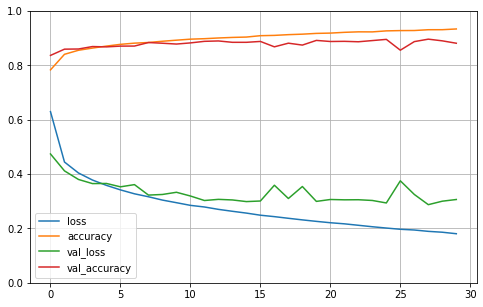

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()